Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины. Выполнил Суслов Сергей
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.
2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
•	мат.ожидание (*)
•	2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты
•	квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины.
3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).


In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import seaborn as sns
%matplotlib inline

Первый датасет содержит игроков из компьютерного футбольного симулятора EA SPORTS FC 25 (https://www.kaggle.com/datasets/nyagami/ea-sports-fc-25-database-ratings-and-stats)

In [14]:
data = pd.read_csv('all_players.csv')
data

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17732,1571,17146,Araya Dennis,53,42,57,49,52,25,...,England,Barclays WSL,Spurs,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17733,17733,1572,17146,Alexia Férnandez,53,53,55,51,53,34,...,Spain,Liga F,Granada CF,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17734,17734,1573,17146,Aleigh Gambone,53,60,58,53,56,49,...,United States,Scottish Women's League,Glasgow City FC,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17735,17735,1574,17146,Joy Lysser,53,61,52,48,56,53,...,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           17737 non-null  int64  
 1   Unnamed: 0             17737 non-null  int64  
 2   Rank                   17737 non-null  int64  
 3   Name                   17737 non-null  object 
 4   OVR                    17737 non-null  int64  
 5   PAC                    17737 non-null  int64  
 6   SHO                    17737 non-null  int64  
 7   PAS                    17737 non-null  int64  
 8   DRI                    17737 non-null  int64  
 9   DEF                    17737 non-null  int64  
 10  PHY                    17737 non-null  int64  
 11  Acceleration           17737 non-null  int64  
 12  Sprint Speed           17737 non-null  int64  
 13  Positioning            17737 non-null  int64  
 14  Finishing              17737 non-null  int64  
 15  Sh

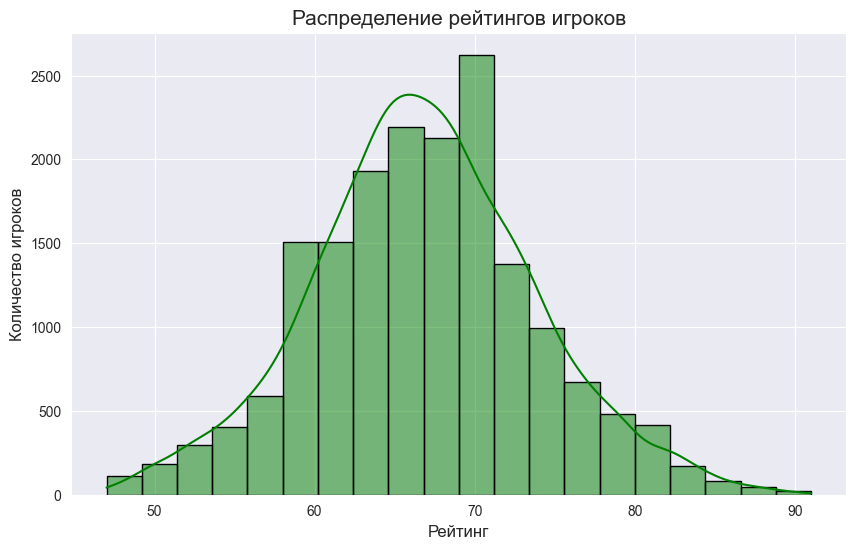

In [16]:
column = 'OVR' # Рейтинг игрока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column, bins=20, kde=True, color='green', edgecolor='black')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.title('Распределение рейтингов игроков', fontsize=15)
plt.grid(True)
plt.show()

In [17]:
# 1. Математическое ожидание (среднее значение)
mean_value = data[column].mean()
print(f"Математическое ожидание: {mean_value}")

# 2. Дисперсия
variance = data[column].var()
print(f"Дисперсия: {variance}")

# 3. Асимметрия
skewness = data[column].skew()
print(f"Асимметрия: {skewness}")

# 4. Эксцесс
kurtosis = data[column].kurtosis()
print(f"Эксцесс: {kurtosis}")

# 5. Квантили уровня 0,05 и 0,95
quantile_05 = data[column].quantile(0.05)
quantile_95 = data[column].quantile(0.95)
print(f"Квантиль 0,05: {quantile_05}")
print(f"Квантиль 0,95: {quantile_95}")

# 2,5%-ная точка
quantile_025 = data[column].quantile(0.025)
print(f"2,5%-ная точка: {quantile_025}")

Математическое ожидание: 66.79624513728365
Дисперсия: 49.434913730612486
Асимметрия: 0.09809936221694848
Эксцесс: 0.13493255124983117
Квантиль 0,05: 55.0
Квантиль 0,95: 79.0
2,5%-ная точка: 53.0


Второй датасет содержит данные о влиянии пандемии COVID-19 на работников (https://www.kaggle.com/datasets/gcreatives/impact-of-covid-19-on-working-professionals)

In [18]:
data = pd.read_csv('synthetic_covid_impact_on_work.csv')
data

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,7.961822,2.283857,1,Medium,1,1,1,0,0,0,1,IT,1
9996,0,0,10.917086,3.621406,0,Medium,0,0,1,0,1,0,0,IT,1
9997,1,1,10.176211,1.039689,1,Low,0,1,0,1,1,1,1,Retail,1
9998,1,1,11.903973,3.756725,0,Medium,1,1,0,1,1,1,1,Education,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

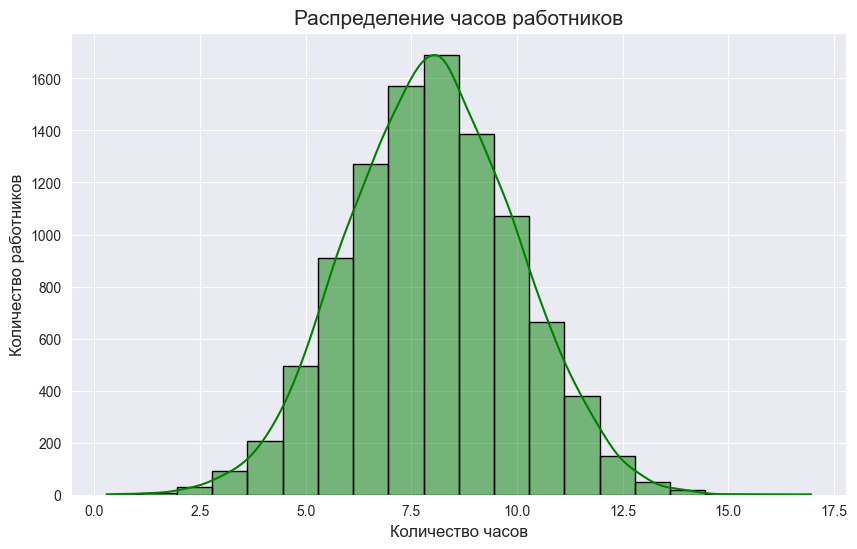

In [20]:
column = 'Hours_Worked_Per_Day' # Рейтинг игрока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column, bins=20, kde=True, color='green', edgecolor='black')
plt.xlabel('Количество часов', fontsize=12)
plt.ylabel('Количество работников', fontsize=12)
plt.title('Распределение часов работников', fontsize=15)
plt.grid(True)
plt.show()

In [21]:
# 1. Математическое ожидание (среднее значение)
mean_value = data[column].mean()
print(f"Математическое ожидание: {mean_value}")

# 2. Дисперсия
variance = data[column].var()
print(f"Дисперсия: {variance}")

# 3. Асимметрия
skewness = data[column].skew()
print(f"Асимметрия: {skewness}")

# 4. Эксцесс
kurtosis = data[column].kurtosis()
print(f"Эксцесс: {kurtosis}")

# 5. Квантили уровня 0,05 и 0,95
quantile_05 = data[column].quantile(0.05)
quantile_95 = data[column].quantile(0.95)
print(f"Квантиль 0,05: {quantile_05}")
print(f"Квантиль 0,95: {quantile_95}")

# 2,5%-ная точка
quantile_025 = data[column].quantile(0.025)
print(f"2,5%-ная точка: {quantile_025}")

Математическое ожидание: 8.006537601471276
Дисперсия: 3.914336428539815
Асимметрия: 0.01377725498855068
Эксцесс: -0.031117255340822325
Квантиль 0,05: 4.809743180213274
Квантиль 0,95: 11.292779689579005
2,5%-ная точка: 4.180823720483095
